Fractal Clustering

Dataset : https://www.kaggle.com/tunguz/big-five-personality-test

In this assignment, we will try to come up with the ideal golden cluster with the people that should have ideal combination of all the 5 personalities.


1) Extroversion

2) Neuroticism

3) Conscientious

4) Agreeable

5) Open



Step 1: Importing the libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

In [ ]:
# Creating the dataframe for the given dataset

data_raw = pd.read_csv('/content/drive/MyDrive/Datasets/data-final.csv', sep='\t') 
data = data_raw.copy()
pd.options.display.max_columns = 150

# We will remove the columns which are not required inside the assignment
data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)



In [ ]:
# Let us take a quick look on the dataset
print('Number of participants(records) in this dataset: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


Step 2: Data Processing

In this step, we will remove the duplicate records and null values inside the datsset.

In [ ]:

data = data.dropna()# dropping null values
data = data.drop_duplicates() # dropping the duplicate values inside the dataset
#Number of rows and columns 
data.shape 

(1009391, 51)

In [ ]:
# Groups and Questions

# Personality No. 1: Extrovision
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}
# Personality No. 2: Neuroticism
est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}
#Personality No. 3: Agreeable 
agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}
# Personality No. 4: Conscientious
csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}
# Personality No. 1: Open
opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [ ]:
# Unnecessary column removed
df = data.drop('country', axis=1)
df.shape

(1009391, 50)

In [ ]:
# Creating the "Extrovision"  personality column  (Average of all the questions)

extroversion = (df['EXT1'] + df['EXT2'] + df['EXT3'] + df['EXT4'] + df['EXT5'] + df['EXT6'] + df['EXT7'] + df['EXT8'] + df['EXT9'] + df['EXT10'])/10
df['Extroversion'] = extroversion
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Extroversion
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,3.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,3.4
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2.9
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,2.6
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,3.5


In [ ]:
# Creating the "Neuroticism" personality column  (Average of all the questions)


neuroticism = (df['EST1'] + df['EST2'] + df['EST3'] + df['EST4'] + df['EST5'] + df['EST6'] + df['EST7'] + df['EST6'] + df['EST9'] + df['EST10'])/10
df['neuroticism'] = neuroticism
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Extroversion,neuroticism
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,3.0,2.4
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,3.4,2.1
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2.9,2.6
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,2.6,2.7
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,3.5,2.3


In [ ]:
# Creating the "Agreeable" personality column  (Average of all the questions)


agreeable = (df['AGR1'] + df['AGR2'] + df['AGR3'] + df['AGR4'] + df['AGR5'] + df['AGR6'] + df['AGR7'] + df['AGR8'] + df['AGR9'] + df['AGR10'])/10
df['agreeable'] = agreeable
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Extroversion,neuroticism,agreeable
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,3.0,2.4,3.1
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,3.4,2.1,3.2
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2.9,2.6,2.8
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,2.6,2.7,3.2
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,3.5,2.3,3.0


In [ ]:
# # Creating the "Conscientious" personality column  (Average of all the questions)


conscientious= (df['CSN1'] + df['CSN2'] + df['CSN3'] + df['CSN4'] + df['CSN5'] + df['CSN6'] + df['CSN7'] + df['CSN8'] + df['CSN9'] + df['CSN10'])/10
df['conscientious'] = conscientious
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Extroversion,neuroticism,agreeable,conscientious
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,3.0,2.4,3.1,3.2
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,3.4,2.1,3.2,3.1
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2.9,2.6,2.8,2.8
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,2.6,2.7,3.2,2.7
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,3.5,2.3,3.0,3.2


In [ ]:
# Creating the "open" personality column  (Average of all the questions)


open = (df['OPN1'] + df['OPN2'] + df['OPN3'] + df['OPN4'] + df['OPN5'] + df['OPN6'] + df['OPN7'] + df['OPN8'] + df['OPN9'] + df['OPN10'])/10
df['open'] = open
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Extroversion,neuroticism,agreeable,conscientious,open
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,3.0,2.4,3.1,3.2,3.3
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,3.4,2.1,3.2,3.1,2.7
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2.9,2.6,2.8,2.8,3.1
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,2.6,2.7,3.2,2.7,3.1
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,3.5,2.3,3.0,3.2,3.6


Column Removal:

In this stage, we will remove all the columns except the 5 personality column which contains the average of the markings out if 5

In [ ]:
df = df.drop(df.loc[:, 'EXT1':'OPN10'].columns, axis=1)
df

,Extroversion,neuroticism,agreeable,conscientious,open
0,3.0,2.4,3.1,3.2,3.3
1,3.4,2.1,3.2,3.1,2.7
2,2.9,2.6,2.8,2.8,3.1
3,2.6,2.7,3.2,2.7,3.1
4,3.5,2.3,3.0,3.2,3.6
...,...,...,...,...,...
1015336,3.2,3.3,3.6,3.1,2.9
1015337,3.4,4.1,3.3,2.8,3.3
1015338,3.3,2.7,3.5,3.3,3.6
1015339,2.8,3.5,3.1,3.0,3.5


Note: The clustering technique is not working for entire dataset, so we will apply a set of 8000 records to generate the Golden Cluster 

In [ ]:


df_sample = df[:8000]

In [ ]:
df_sample.shape
# Each column contains the average value of every personality

(8000, 5)

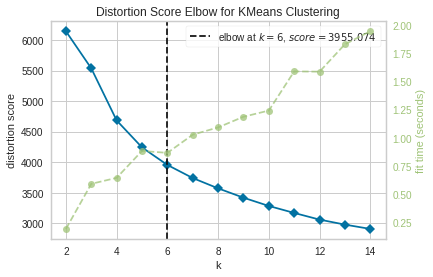

In [ ]:
# Elbow method for determining the ideal number of clusters
km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

In [ ]:
# Function to generate silhoutte score and SSE aas a metric to determine ideal number of cluster 
def plot_cluster(df, max_loop= 20):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X) #apply k-means
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    # Generating the images 
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

In [ ]:
# we will use the robust method to scale the data and thereafter, we will apply kmeans clustering 
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    # calculating the silhoutte score and sse values 
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(round(score,2)))
    print("sse withing cluster: " + str(round(sse_within_cluster)))
    
    return df
# plt.scatter(data_embeddings_pca[:, 0], data_embeddings_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

#First Clustering

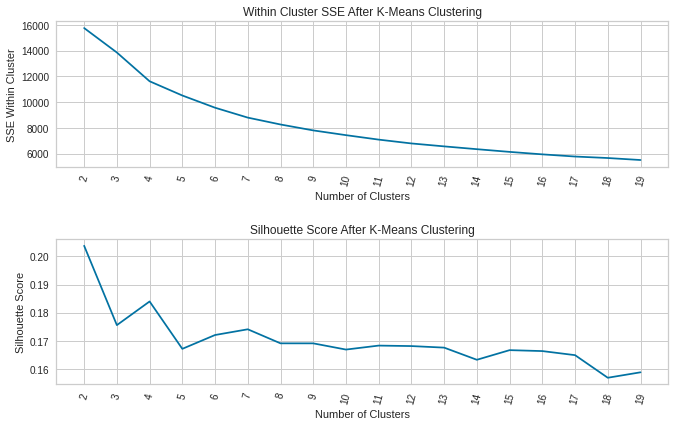

In [ ]:
plot_cluster(df_sample)

Note: From the above image, we can see that data might generate better clusters with n = 5(number of clusters)

In [ ]:
firsttrail = apply_cluster(df_sample, clusters = 5)

clustering performance
-----------------------------------
silhouette score: 0.17
sse withing cluster: 10517


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
firsttrail

,Extroversion,neuroticism,agreeable,conscientious,open,cluster
0,3.0,2.4,3.1,3.2,3.3,3
1,3.4,2.1,3.2,3.1,2.7,1
2,2.9,2.6,2.8,2.8,3.1,1
3,2.6,2.7,3.2,2.7,3.1,1
4,3.5,2.3,3.0,3.2,3.6,3
...,...,...,...,...,...,...
8010,3.5,3.9,3.8,2.8,3.1,2
8011,3.1,3.9,3.2,3.0,3.3,2
8012,3.4,3.6,3.0,3.3,3.3,2
8013,2.9,2.5,2.9,3.1,3.0,1


In [ ]:
cluster_per = (firsttrail.groupby('cluster').agg({"Extroversion" :"mean","neuroticism" :"mean","agreeable" :"mean","conscientious" :"mean","open" :"mean",}).reset_index())
# Calculating the average of all the 5 personalities
count = np.bincount(firsttrail.cluster)

cluster_per['ClusterCount'] = count
cluster_per

,cluster,Extroversion,neuroticism,agreeable,conscientious,open,ClusterCount
0,0,3.110081,3.442249,3.411905,3.547568,3.402330,1974
1,1,3.008270,2.990614,3.044952,2.900609,2.811618,1971
2,2,3.011056,3.553914,3.100383,2.974877,3.437548,1827
3,3,3.053494,2.405172,3.113249,3.066379,3.387069,2204
4,4,0.433333,0.229167,0.345833,0.258333,0.254167,24


Note: As the number of elements are greater in second cluster, we will take all the elements in 2nd cluster for internal clustering to generate golden cluster

In [ ]:
df2_sub = df_sample.query("cluster == 2").reset_index(drop = True)
df2_sub                                       

,Extroversion,neuroticism,agreeable,conscientious,open,cluster
0,3.5,3.0,3.3,2.9,3.7,2
1,3.1,3.4,2.9,3.2,3.8,2
2,3.0,3.8,2.2,3.3,3.2,2
3,2.8,3.6,3.2,2.6,3.4,2
4,3.6,3.0,3.3,2.5,3.3,2
...,...,...,...,...,...,...
1822,2.7,4.0,3.3,3.0,2.9,2
1823,3.0,3.8,2.9,3.0,3.6,2
1824,3.5,3.9,3.8,2.8,3.1,2
1825,3.1,3.9,3.2,3.0,3.3,2


In [ ]:
df2_sub1 = df2_sub[['Extroversion','neuroticism','agreeable','conscientious','open']]
df2_sub1.head()

,Extroversion,neuroticism,agreeable,conscientious,open
0,3.5,3.0,3.3,2.9,3.7
1,3.1,3.4,2.9,3.2,3.8
2,3.0,3.8,2.2,3.3,3.2
3,2.8,3.6,3.2,2.6,3.4
4,3.6,3.0,3.3,2.5,3.3


# Second Clustering( Internal Clustering)

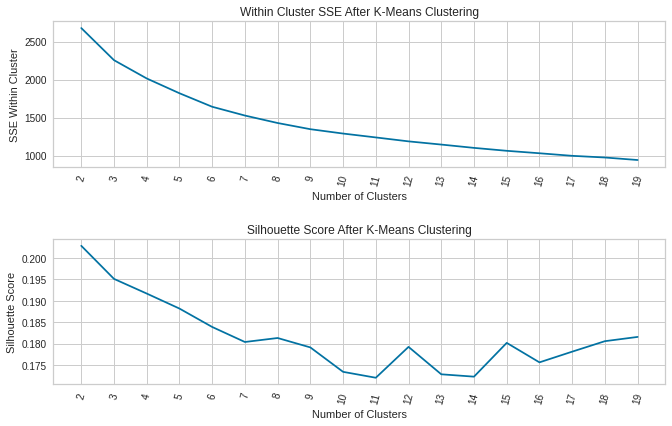

In [ ]:
plot_cluster(df2_sub1, max_loop=20)

Note: From the above image, we can see that data might generate better clusters with n = 9(number of clusters)



In [ ]:
second_trial= apply_cluster(df2_sub1, clusters=9)

clustering performance
-----------------------------------
silhouette score: 0.18
sse withing cluster: 1349


In [ ]:
cluster_per1 = (second_trial.groupby('cluster').agg({"Extroversion" :"mean","neuroticism" :"mean","agreeable" :"mean","conscientious" :"mean","open" :"mean",}).reset_index())
# Calculating the average of all the 5 personalities
count = np.bincount(second_trial.cluster)

cluster_per1['ClusterCount'] = count
cluster_per1

,cluster,Extroversion,neuroticism,agreeable,conscientious,open,ClusterCount
0,0,3.041579,4.037368,3.408947,2.801053,3.220000,190
1,1,2.918981,3.375926,2.838889,2.668056,3.491204,216
2,2,3.060714,3.327273,3.241883,2.988312,3.295130,308
3,3,3.029878,3.213415,3.207317,2.999390,3.803049,164
4,4,2.972692,3.323462,2.898846,3.193077,3.378846,260
5,5,3.000935,3.942523,2.938785,3.083645,3.191121,214
6,6,3.091026,3.300000,3.462179,2.642308,3.484615,156
7,7,2.900000,3.725893,2.555357,3.333929,3.633036,112
8,8,3.048792,3.888889,3.237198,3.085024,3.690821,207


Note: As the number of elements are greater in second cluster, we will take all the elements in 2nd cluster for internal clustering to generate golden cluster

In [ ]:
df2_sub2 = df2_sub1.query("cluster == 2").reset_index(drop = True)
df2_sub2            

,Extroversion,neuroticism,agreeable,conscientious,open,cluster
0,2.8,3.6,3.2,3.1,3.1,2
1,3.2,3.1,3.2,3.0,3.5,2
2,3.4,3.3,3.2,2.9,3.2,2
3,3.0,3.5,3.1,2.9,3.1,2
4,2.9,3.6,3.3,3.0,3.5,2
...,...,...,...,...,...,...
303,3.0,3.0,3.3,2.9,3.3,2
304,2.9,3.7,3.2,3.2,3.3,2
305,3.8,3.2,3.1,3.0,3.3,2
306,3.0,3.1,3.6,2.9,3.2,2


In [ ]:
df2_sub3 = df2_sub2[['Extroversion','neuroticism','agreeable','conscientious','open']]
df2_sub3.head()

,Extroversion,neuroticism,agreeable,conscientious,open
0,2.8,3.6,3.2,3.1,3.1
1,3.2,3.1,3.2,3.0,3.5
2,3.4,3.3,3.2,2.9,3.2
3,3.0,3.5,3.1,2.9,3.1
4,2.9,3.6,3.3,3.0,3.5


# Third Clustering( Internal Clustering)

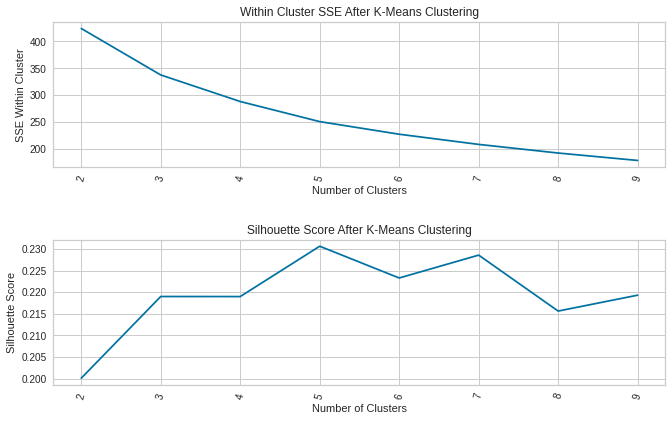

In [ ]:
plot_cluster(df2_sub3, max_loop=10)

Note: From the above image, we can see that data might generate better clusters with n = 7(number of clusters)



In [ ]:
third_trial= apply_cluster(df2_sub3, clusters=7)

clustering performance
-----------------------------------
silhouette score: 0.23
sse withing cluster: 209


In [ ]:
cluster_per3 = (third_trial.groupby('cluster').agg({"Extroversion" :"mean","neuroticism" :"mean","agreeable" :"mean","conscientious" :"mean","open" :"mean",}).reset_index())
# Calculating the average of all the 5 personalities
count = np.bincount(third_trial.cluster)

cluster_per3['ClusterCount'] = count
cluster_per3

,cluster,Extroversion,neuroticism,agreeable,conscientious,open,ClusterCount
0,0,3.022917,3.262500,3.185417,3.129167,3.220833,48
1,1,3.132353,3.100000,3.400000,2.976471,3.314706,34
2,2,3.046154,3.309615,3.121154,2.807692,3.225000,52
3,3,3.122807,3.435088,3.277193,3.007018,3.454386,57
4,4,3.011538,3.561538,3.226923,3.042308,3.196154,52
5,5,3.074074,3.433333,3.459259,2.981481,3.211111,27
6,6,3.028947,3.078947,3.150000,2.971053,3.423684,38


Conclusion: As seen from above statistics, the silhoutte score is   0.23 and hence, the latest cluster that is formed will be our golden cluster.

In this tab, the Fractal clustering ends .

References 

1)https://www.kaggle.com/tunguz/big-five-personality-test

2)https://github.com/ttimong/blog-posts/blob/master/blog1-kmeans-clustering/final_model.ipynb

3)https://ieeexplore.ieee.org/document/1540556

4)https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1?gi=7427d72f41d3

